## HW3 Усольцев Никита - nikitav030301@gmail.com
### Задание A:

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [123]:
x_start = 95
x_end = 105

In [124]:
def f_interpol(x: float) -> float:
    return x * np.sin(2 * x)

In [125]:
def figure_plot():
    figure(figsize=(18, 6), dpi=80)

In [126]:
A = [x for x in np.arange(x_start, x_end, 0.01)]
B_result = [f_interpol(x) for x in A]

In [127]:
def gen_interpol_points_uniform(N : int) -> ([], []):
    step = (x_end - x_start) / N
    X = [x for x in np.arange(x_start, x_end + 1, step)]
    Y = [f_interpol(x) for x in X]
    return  X, Y

In [128]:
def f_cheb(k: int, N: int) -> float:
    return np.cos((np.pi * (2 * k - 1)) / (2 * N))

In [129]:
def gen_cheb_nodes(N: int) -> []:
    result = []
    for k in range(1, N + 1):
        test = ((x_end - x_start) / 2) * f_cheb(k, N) + ((x_end + x_start) / 2)
        if test < 95 or test > 105:
            print("AAAAAAAA " + test)
        assert test >= 95
        assert test <= 105
        result.append(test)
    return result

In [130]:
def gen_interpol_points_cheb(N : int) -> ([], []):
    X = gen_cheb_nodes(N)
    Y = [f_interpol(x) for x in X]
    return X, Y

In [131]:
maxs_of_bias = []

def calc_bias(N: int, is_uniform: bool) -> []:
    X, Y = ([], [])
    if is_uniform:
        X, Y = gen_interpol_points_uniform(N)
    else:
        X, Y = gen_interpol_points_cheb(N)
    B_interpolation = []
    for x in A:
        res = 0.0
        for k, f_k in enumerate(Y):
            x_k = X[k]
            p = f_k
            for i, x_i in enumerate(X):
                if i != k:
                    p *= ((x - x_i) / (x_k - x_i))
            res += p
        B_interpolation.append(res)
    return [abs(y1 - y2) for y1, y2 in zip(B_result, B_interpolation)]

In [132]:
def draw_a() -> None:
    figure_plot()
    current_legends = []

    for N in (5, 10, 15):
        B_bias = calc_bias(N, True)
        print("For N = {} the max bias is {}".format(N, max(B_bias)))
        plt.plot(A, B_bias, linewidth=2)
        current_legends.append("N = {}".format(N))

    plt.grid()
    plt.legend(current_legends)
    plt.show()

For N = 5 the max bias is 247.65768162102415
For N = 10 the max bias is 365.0420193178307
For N = 15 the max bias is 11.448024729571145


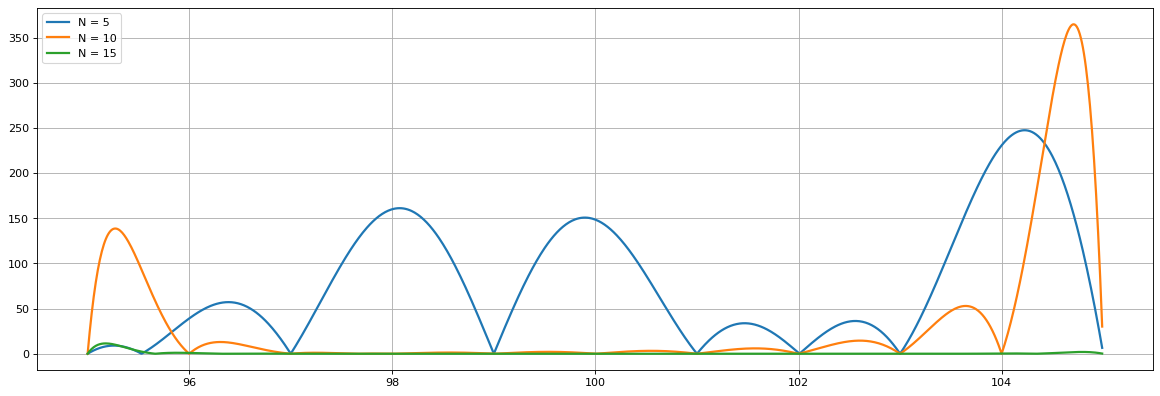

In [133]:
draw_a()
for i, mx in enumerate(maxs_of_bias):
    print(mx)

#### Объяснение полученных результатов:
Мы видим, что чем больше точек для интерполяции, тем меньше погрешность и тем наш полином будет лучше приближать
исходную функцию. Ещё заметно, что между 2-мя точками интерполяции, на графике погрешности есть экстремум, что ожидаймо, ведь
именно в этих "узких" местах мы меньше всего знаем про исходную функцию, поэтому ошибка и большая.

### Задание B:

In [134]:
def draw_bias(is_uniform: bool) -> None:
    figure_plot()

    maxs_of_bias = []
    interpol_points = range(5, 51)
    for N in interpol_points:
        B_bias = calc_bias(N, is_uniform)
        maxs_of_bias.append(max(B_bias))

    plt.plot(interpol_points, maxs_of_bias, linewidth=3)
    plt.grid()
    plt.show()

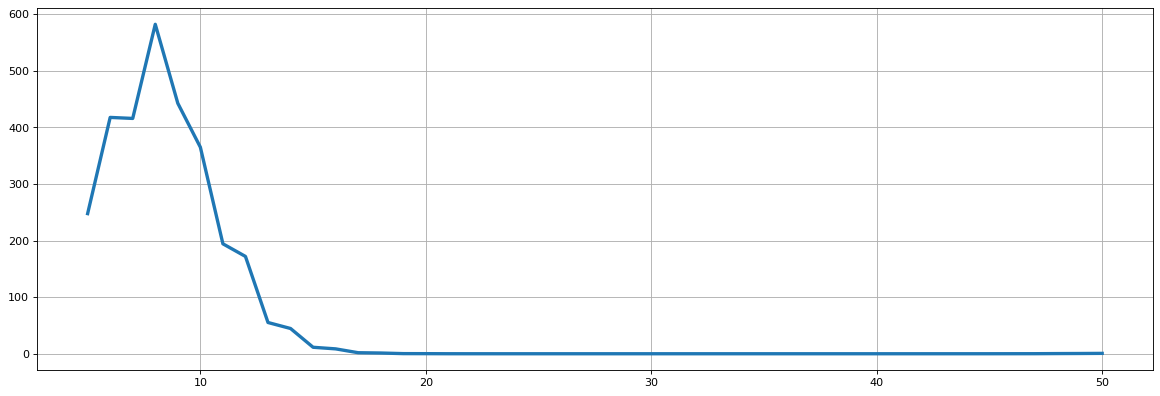

In [135]:
def draw_b() -> None:
    draw_bias(True)

draw_b()

#### Объяснение полученных результатов:
Результат предсказуем, чем больше точек(узлов) мы используем для интерполяции
тем лучше мы приближаем исходную функцию.

### Задание C:

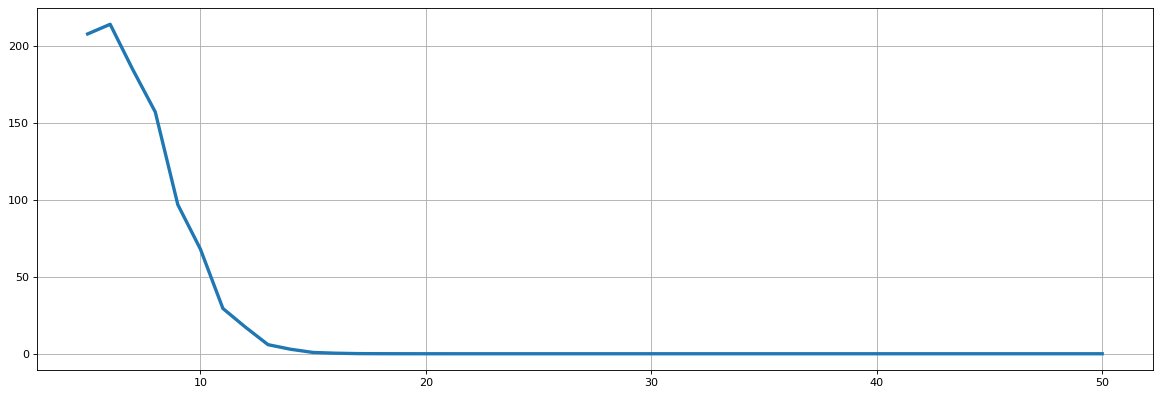

In [136]:
def draw_c() -> None:
    draw_bias(False)

draw_c()

#### Объяснение полученных результатов:
Так же как и в пункте B мы получили, что чем больше узлов интерполяции, тем меньше погрешность.
И при этом максимальное значение погрешности меньше, чем в пункте B, на лекции мы доказывали факт того, что
Чебышевские узлы лучше Равномерных, тк оценка на погрешность меньше.